---
title: "ODE Examples"
subtitle: "BMES 678: Programming Assignment"
author: "Tony Kabilan Okeke"
format: PrettyPDF-pdf
---

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

import tools

## Glycolytic Oscillations [40%]

Consider the Glycolytic Oscillations described in: [Bier et.a., Control analysis of glycolytic oscillations](https://sacan.biomed.drexel.edu/lib/exe/fetch.php?rev=&media=course:sim2:odeexamples:glycolyticoscillations.bier96.pdf), BiophysChem, 1996.

Replicate Fig.3 in that paper by numerically simulating the extended model. Only plot the species shown in Fig.3 of the paper.

Determine the initial concentrations of H,I,T, and G by “eye-ball”ing Fig.3. Use 0.1 for any initial concentration not specified in their paper. Run the simulation up to 250 seconds. Show the concentrations of H,I,T,G between 0 to 250 seconds.

Note that your plot will not look identical to the one shown in the paper. In the paper, “Fig. 3 shows the eventual limit cycle in a simulation of the full model.”, which means they cropped the initial portion of the simulation. Their time axis (x-axis) in Figure3 is therefore mislabeled and does not start from real simulation time=0, but they start their plot at some real simulation time>0.



The equations below define the extended model described in the paper.

\begin{align*}
\nu_1(T,G) &= k_1TG \\ 
\nu_3(T, I, H) &= k_3(C_{AD} -T)I(P_{tot} - I -T)(C_{N}^{tot} - H) \\
\nu_5(I,H) &= \frac{k_5IH}{K_H +  H} \\
\nu_7(P,H) &= \frac{k_7PH}{H + K_{HP}} \\
\nu_8(E,H) &= k_8E (C_{N}^{tot} - H) \\
\nu_9(T) &= k_9T \\
\nu_{11}(A,T) &= k_{11}AT \\
\nu_p(T) &= \frac{k_pT}{K_M + T} \\
\nu_N(H) &= \frac{k_NH}{H + K_{HO}} \\
\\
G'(t) &= V_{in} - \nu_1 \\
T'(t) &= -2\nu_1 + 2\nu_3 - \nu_9 - \nu_p - \nu_{11} \\
\end{align*}

\begin{align*}
I'(t) &= 2\nu_1 - \nu_3 - \nu_5 \\
H'(t) &= \nu_3 - \nu_7 + 2\nu_8 - \nu_N - \nu_5 \\ 
P'(t) &= \nu_3 - \nu_7 \\
E'(t) &= 0 \\
A'(t) &= \nu_8 - \nu_{11}
\end{align*}

The simulation will be run with the following parameter values and initial conditions:

\begin{align*}
V_{in} &= 0.24 \\
k_1 &= 0.05 \\
k_3 &= 0.05 \\
k_5 &= 0.4 \\
k_7 &= 0.1 \\
k_8 &= 0.001 \\
k_9 &= 0.3 \\
k_{11} &= 0.02 \\
K_H &= 0.02 \\
K_{HP} &= 0.2 \\
K_M &= 2 \\
k_{HO} &= 0.2 \\
k_p &= 0.5 \\
k_N &= 0.08 \\
C_{AD} &= 8 \\
P_{tot} &= 10 \\ 
C_{N}^{tot} &= 8 \\ 
E &= 2 \\
H(0) &= 0.17 \\
I(0) &= 0.09 \\
T(0) &= 1.03 \\
G(0) &= 4.65 \\
P(0) &= 0.1 \\
A(0) & = 0.1 \\
\end{align*}

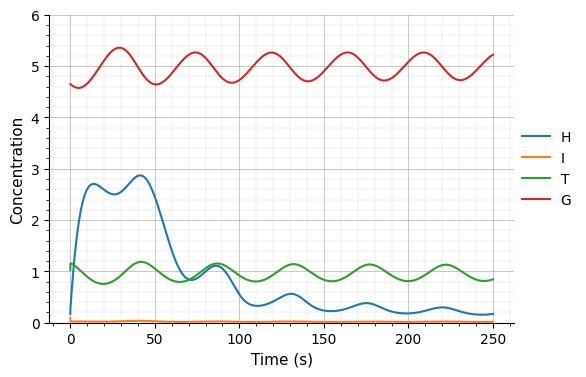

In [2]:
#| fig-align: center
#| fig-cap: Gylcolytic Oscillations Model

# simulation parameters
tspan = (0, 250)
h = 0.005
Y0 = [0.17, 0.09, 1.03, 4.65, 0.1, 0.1]  # [H, I, T, G, P, A]

def glyco_oscillations(t, Y):
    # define constants
    Vin = 0.24
    k1, k3, k5, k7, k8, k9, k11 = 0.05, 0.05, 0.4, 0.1, 0.001, 0.3, 0.02
    kH, kHP, kM, kHO, kp, kN = 0.02, 0.2, 2.0, 0.2, 0.5, 0.08
    CAD = 8
    Ptot = 10
    CtotN = 8
    E = 2

    # extract variables
    H, I, T, G, P, A = Y

    # compute reaction rates
    v1 = k1 * T * G
    v3 = k3 * (CAD - T) * I * (Ptot - I - T) * (CtotN - H)
    v5 = (k5 * I * H) / (kH + H)
    v7 = (k7 * P * H) / (H + kHP)
    v8 = k8 * E * (CtotN - H)
    v9 = k9 * T
    v11 = k11 * A * T
    vp = (kp * T) / (kM + T)
    vN = (kN * H) / (H + kHO)

    # compute derivatives
    dG = Vin - v1
    dT = -2*v1 + 2*v3 - v9 - vp - v11
    dI = 2*v1 - v3 - v5
    dH = v3 - v7 + 2*v8 - vN - v5
    dP = v3 - v7
    dA = v8 - v11
    
    return np.array([dH, dI, dT, dG, dP, dA])

# simulate the model
t, Y = tools.rk4(glyco_oscillations, tspan, Y0, h)

# plot results
fig, ax = plt.subplots(figsize=(6,4))
tools.style_axis(ax, "Time (s)", "Concentration")
ax.plot(t, Y[:, :4], label=["H", "I", "T", "G"])
ax.set_ylim(0, 6)
ax.legend(loc="center right", bbox_to_anchor=(1.15, 0.5), frameon=False)

## Three-node Repressive Network [60%]

Consider the following three-node repressive network described in: Mogilner et.al., ["Review Quantitative Modeling in Cell Biology: What Is It Good for?"](https://sacan.biomed.drexel.edu/lib/exe/fetch.php?rev=&media=course:sim2:odeexamples:quantitativebiology.whatisitgoodfor.pdf), Mogilner, 2006. Implement this network as a system of ODEs and numerically simulate it. The requirement from your solution is that you obtain and demonstrate a similar oscillating behavior.

The parameters are available from an earlier paper, ["A biochemical oscillator explains several aspects of Myxococcus xanthus behavior during development"](https://sacan.biomed.drexel.edu/lib/exe/fetch.php?rev=&media=course:sim2:odeexamples:myxococcus%20xanthus.biochemical%20oscillator.pdf), Igoshin, 2004. Use all of those parameter values as is, except use “kamax” as a constant kamax=0.08 (this is the same parameter as denoted by “kc1” in the Mogilner paper). Use all initial concentrations set to 0.5 (so that e.g. A+Ap = Atotal = 1). They have renamed the parameters between the two papers, you have to identify which parameter maps to which parameter in the two papers.

The paper uses a kamax parameter that varies with time, whereas you are asked to use a constant kamax in this assignment. Because of this difference, your result will not be identical to that of the paper. However, your result should still display an oscillatory behavior in the concentration of the species.

![](hw3noderepressive.png)

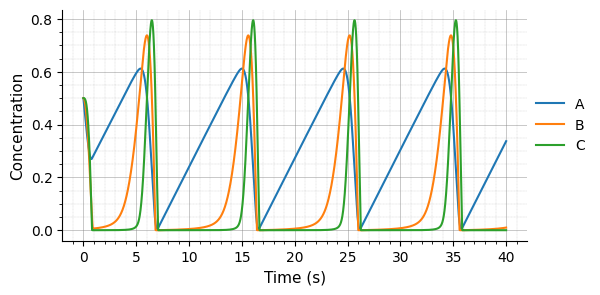

In [3]:
#| fig-align: center
#| fig-cap: Repressive Network Model

# simulation parameters
tspan = (0, 40)
h = 0.005
Y0 = [0.5, 0.5, 0.5]  # [A, B, C]


def repressive_network(t, Y): 
    # define constants
    K1  = 1e-2
    Kd1 = 5e-3
    K2  = 5e-3
    Kd2 = 5e-3
    K3  = 5e-3
    Kd3 = 5e-3
    kc1 = 0.08
    kd1 = 1
    kc2 = 4
    kd2 = 2
    kc3 = 4
    kd3 = 2
    Atot = Btot = Ctot = 1

    # extract variables
    A, B, C = Y
    
    # compute derivatives
    dA = (kc1 * (Atot - A)) / (K1 + Atot - A) - (kd1 * A * C) / (Kd1 + A)
    dB = (kc2 * (Btot - B) * A) / (K2 + Btot - B) - (kd2 * B) / (Kd2 + B)
    dC = (kc3 * (Ctot - C) * B) / (K3 + Ctot - C) - (kd3 * C) / (Kd3 + C)
    
    return np.array([dA, dB, dC])


# simulate the model
t, Y = tools.rk4(repressive_network, tspan, Y0, h)

# plot results
fig, ax = plt.subplots(figsize=(6,3))
tools.style_axis(ax, "Time (s)", "Concentration")
ax.plot(t, Y[:, :4], label=["A", "B", "C"])
ax.legend(loc="center right", bbox_to_anchor=(1.15, 0.5), frameon=False)